# Introduction

This notebook is an exercise from Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, by Aurélien Geron.

It aims to build different Deep Neural Networks to predict images in the dataset CIFAR-10, availiable in https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

[3]


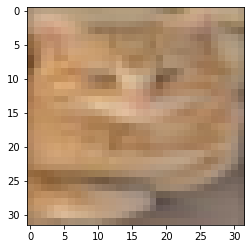

In [3]:
import matplotlib.pyplot as plt

# see random image
some_index = np.random.choice(X_train.shape[0])
some_image = X_train[some_index]
some_label = y_train[some_index]
plt.imshow(some_image)
print(some_label)

In [4]:
# unique values in y_train
y_train_unique = np.unique(y_train)
y_train_unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

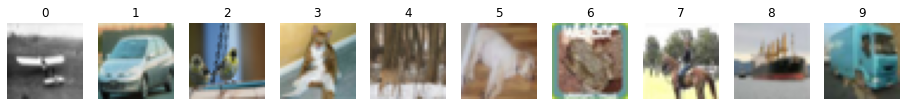

In [5]:
# plot one image from each class in a subplot
fig = plt.figure(figsize=(16, 8))
for label in y_train_unique:
    image_index = np.random.choice(np.where(y_train == label)[0])
    plt.subplot(1, len(y_train_unique), label + 1)
    plt.imshow(X_train[image_index])
    plt.axis('off')
    plt.title(label)

### a)
Build a DNN with 20 hidden layers of 100 neurons each. Use the He initialization and the ELU activation function.

In [ ]:
X_train.shape

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)

In [ ]:
model = keras.models.Sequential()
for i in range(21):
    if i == 0:
        model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
    else:
        model.add(keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'))
model.add(keras.layers.Dense(10, activation='softmax'))

## b)
Using Nadam Optimization and early stopping, train the network.

In [ ]:
# Using Nadam Optimization and early stopping, train the network.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

In [23]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# subplots of loss and accuracy

def compare_loss_acc(history):
    # returns a plotly figure of the loss and accuracy curves for training and validation
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Scatter(x=history.epoch, y=history.history['loss'], name='Training Loss'), row=1, col=1)
    fig.add_trace(go.Scatter(x=history.epoch, y=history.history['val_loss'], name='Validation Loss'), row=1, col=1)
    fig.add_trace(go.Scatter(x=history.epoch, y=history.history['accuracy'], name='Training Accuracy'), row=1, col=2)
    fig.add_trace(go.Scatter(x=history.epoch, y=history.history['val_accuracy'], name='Validation Accuracy'), row=1, col=2)
    fig.update_layout(height=600, width=1000)
    return fig

In [ ]:
fig = compare_loss_acc(history)
fig.show()

## c)
Add Batch Normalization and compare the learning curves

In [10]:
tf.keras.backend.clear_session()
np.random.seed(42)

In [11]:
model_batch = keras.models.Sequential()
for i in range(21):
    if i == 0:
        model_batch.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
        model_batch.add(keras.layers.BatchNormalization())
    else:
        model_batch.add(keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu', use_bias=False))
        model_batch.add(keras.layers.BatchNormalization())
model_batch.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model_batch.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 batch_normalization (BatchN  (None, 3072)             12288     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               307200    
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               10000     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

In [ ]:
model_batch.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])
history_batch = model_batch.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

In [18]:
def compare_lr_curves(history_1, history_1_name, history_2, history_2_name):
    # compare the learning curves of the two models
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Scatter(x=history_1.epoch, y=history_1.history['loss'], name=history_1_name+"Training Loss"), row=1, col=1)
    fig.add_trace(go.Scatter(x=history_1.epoch, y=history_1.history['val_loss'], name=history_1_name+"Validation Loss"), row=1, col=1)
    fig.add_trace(go.Scatter(x=history_1.epoch, y=history_1.history['accuracy'], name=history_1_name+"Training Accuracy"), row=1, col=2)
    fig.add_trace(go.Scatter(x=history_1.epoch, y=history_1.history['val_accuracy'], name=history_1_name+"Validation Accuracy"), row=1, col=2)
    fig.add_trace(go.Scatter(x=history_2.epoch, y=history_2.history['loss'], name=history_2_name+"Training Loss"), row=1, col=1)
    fig.add_trace(go.Scatter(x=history_2.epoch, y=history_2.history['val_loss'], name=history_2_name+"Validation Loss"), row=1, col=1)
    fig.add_trace(go.Scatter(x=history_2.epoch, y=history_2.history['accuracy'], name=history_2_name+"Training Accuracy"), row=1, col=2)
    fig.add_trace(go.Scatter(x=history_2.epoch, y=history_2.history['val_accuracy'], name=history_2_name+"Validation Accuracy"), row=1, col=2)
    
    ## update color of traces
    fig.data[0].update(marker_color='#ff0000')
    fig.data[1].update(marker_color='#800000')
    fig.data[2].update(marker_color='#4da6ff')
    fig.data[3].update(marker_color='#0059b3')
    fig.data[4].update(marker_color='#ff0000')
    fig.data[5].update(marker_color='#800000')
    fig.data[6].update(marker_color='#4da6ff')
    fig.data[7].update(marker_color='#0059b3')
    
    # update layout
    fig.update_layout(height=600, width=1000, template='plotly_white')
    return fig
    

In [ ]:
fig = compare_lr_curves(history_batch, "Batch Normalization", history, "No Batch Normalization")
fig.show()

We can see a huge improvement in both accuracy and loss! With a huge stack of Dense layers (20), probably the gradients of some hidden layers were vanishing or exploding. That's why we had some inconstant training in the first model and a big improvement with Batch Normalization.

## d)
Replace Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes

In [13]:
tf.keras.backend.clear_session()
np.random.seed(42)

In [15]:
X_train.shape

(45000, 32, 32, 3)

In [17]:
# standardize the data
X_train_scaled = X_train / 255.0
X_valid_scaled = X_valid / 255.0

In [21]:
# DNN with SELU activation
he_avg_init = keras.initializers.VarianceScaling(scale=2.0, mode='fan_in', distribution='uniform')
model_selu = keras.models.Sequential()
for i in range(21):
    if i == 0:
        model_selu.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
    else:
        model_selu.add(keras.layers.Dense(100, activation='selu', kernel_initializer=he_avg_init))
model_selu.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model_selu.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)              

In [ ]:
model_selu.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])
history_selu = model_selu.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping])

In [ ]:
fig = compare_lr_curves(history_selu, "SELU Activation", history_batch, "Batch Normalization")
fig.show()

## e)
Try regularizing the model with alpha dropout, and compare with Dropout only.